# Implementing LLOY GARCH WITH EXOGENOUS MEAN

In [26]:
### Imports and Settings 
import datetime as dt
import sys
import numpy as np
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn
import pandas as pd
from pandas_datareader import data as web
import seaborn as sns
from pylab import rcParams 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from arch import arch_model
from numpy.linalg import LinAlgError
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot, moment
from arch import arch_model
from arch.univariate import ARX, ARCH, GARCH, ZeroMean, arch_model
from sklearn.model_selection import TimeSeriesSplit
import warnings

In [2]:
Irithmics = pd.read_csv('agg.csv')
Irithmics = Irithmics[['Date', 'shortProb']]
Irithmics['Date'] = pd.to_datetime(Irithmics['Date'])
Irithmics =Irithmics.set_index('Date')

,shortProb
Date,
2020-01-02,0.025995
2020-01-03,0.022662
2020-01-06,0.013997
2020-01-07,0.003999
2020-01-08,0.002200


In [3]:
start = pd.Timestamp('2017-01-01')
end = pd.Timestamp('2020-12-31')
priceData = web.DataReader('LLOY.L', 'yahoo', start, end)\
      [['Close']]
priceData['logReturn'] = np.log(priceData['Close']).diff().mul(100)
priceData = priceData.dropna()

In [23]:
mod = arch_model(Irithmics['shortProb']*100, mean="ARX", p = 1, q = 0)
res = mod.fit(disp="off")
print(res.summary())
res.aic



                           AR - ARCH Model Results                            
Dep. Variable:              shortProb   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -251.129
Distribution:                  Normal   AIC:                           508.258
Method:            Maximum Likelihood   BIC:                           518.858
                                        No. Observations:                  253
Date:                Mon, Jun 27 2022   Df Residuals:                      252
Time:                        21:15:55   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
Const          0.8266  6.268e-02     13.187  1.036e-39 [  0.704,  0.94

508.2576470938907

In [24]:
ar = ARX(Irithmics['shortProb']*100)
print(ar.fit().summary())

                     AR - Constant Variance Model Results                     
Dep. Variable:              shortProb   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:          Constant Variance   Log-Likelihood:               -352.995
Distribution:                  Normal   AIC:                           709.990
Method:            Maximum Likelihood   BIC:                           717.057
                                        No. Observations:                  253
Date:                Mon, Jun 27 2022   Df Residuals:                      252
Time:                        21:17:51   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
Const          1.3450  6.140e-02     21.907 2.238e-106 [  1.225,  1.46

In [31]:
ar.volatility = ARCH(p=1)
res = ar.fit(update_freq=0, disp="off")
print(res.summary())

                           AR - ARCH Model Results                            
Dep. Variable:              shortProb   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -251.129
Distribution:                  Normal   AIC:                           508.258
Method:            Maximum Likelihood   BIC:                           518.858
                                        No. Observations:                  253
Date:                Mon, Jun 27 2022   Df Residuals:                      252
Time:                        21:18:47   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
Const          0.8266  6.268e-02     13.188  1.035e-39 [  0.704,  0.94

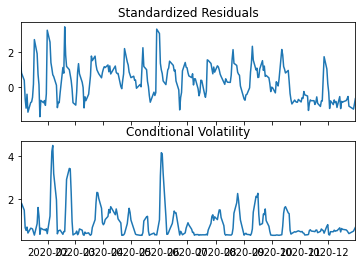

In [34]:
fig = res.plot()